In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from pathlib import Path
import os
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
import re
from textblob import TextBlob
import spacy
from spacy import displacy

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/veochae/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /Users/veochae/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [24]:
#!python -m spacy download en

In [3]:
nlp = spacy.load("en_core_web_sm")

In [5]:
print(Path.cwd())
os.chdir('../data/cleaned data')

/Users/veochae/Desktop/Dreams/data visualization


In [16]:
df = pd.read_csv("complete.csv", index_col= 0)

In [17]:
tag_dict = {"word" :[], "label":[]}
full = []

for i in df['complete']:
    sent = nlp(i)
    for j in sent.ents:
        tag_dict['word'].append(j.text)
        tag_dict['label'].append(j.label_)

# #tag list can be found in : https://www.guru99.com/pos-tagging-chunking-nltk.html

In [18]:
tag_df  = pd.DataFrame(tag_dict)

In [19]:
tag_desc = pd.read_csv("../nltk_tag_description.csv", index_col= None).to_dict("list")

In [ ]:
def barplot(x, z="", l = False):
    t = np.unique(x, return_counts = True)
    s = np.argsort(t[1])

    if l == True:
        x = t[0][s][-z:]
        y = t[1][s][-z:]
    else:   
        x = t[0][s]
        y = t[1][s]

    fig = plt.figure(figsize=(8,8)) #INITIALIZE FIGURE 
    ax = fig.add_subplot()

    ax.bar(x,y)

    ax.set_title(f"Barplot", fontsize = 20)
    ax.set_xlabel(f"", fontsize = 15)
    ax.set_ylabel("Count", fontsize = 15)
    plt.xticks(rotation=90)

    ax.legend()

    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


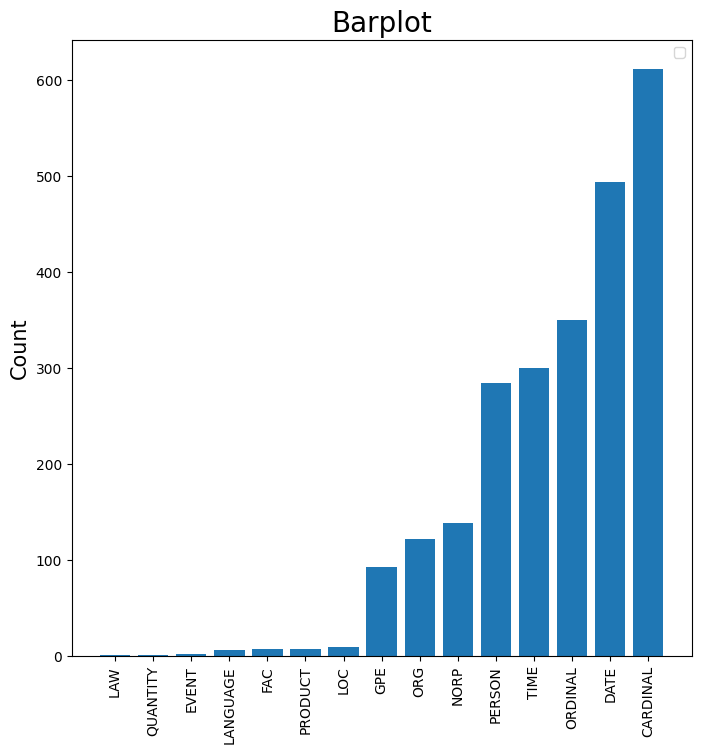

In [ ]:
barplot(tag_df['label'])

In [ ]:
def wordcloud(x, lim):
    text = " ".join(x)
    cloud = WordCloud(collocations = False, max_words = lim).generate(text)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [20]:
tag_desc['$'] = ['Quant']

In [21]:
np.unique(tag_df['label'])

array(['CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW',
       'LOC', 'NORP', 'ORDINAL', 'ORG', 'PERSON', 'PRODUCT', 'QUANTITY',
       'TIME'], dtype=object)

CARDINAL


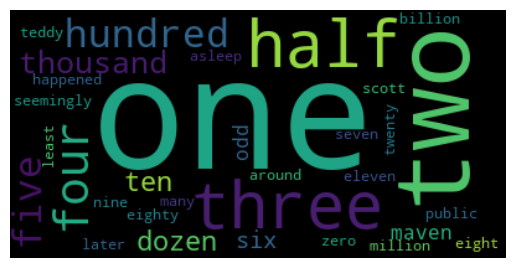

DATE


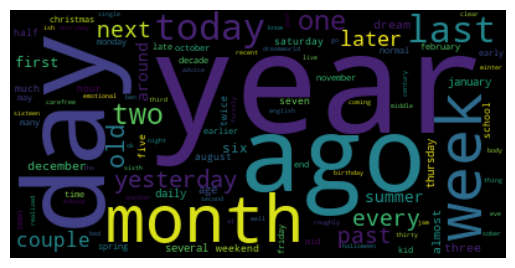

EVENT


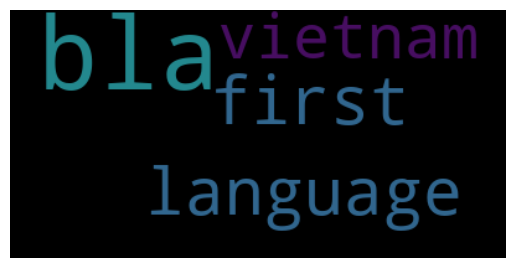

FAC


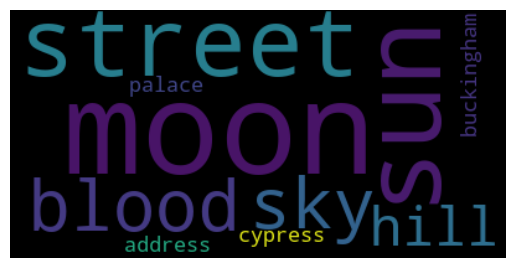

GPE


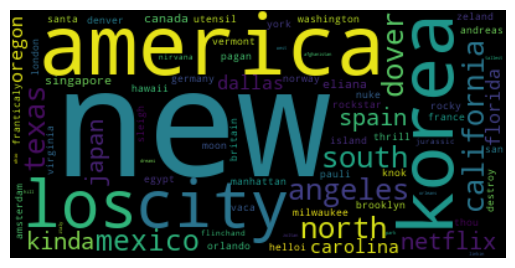

LANGUAGE


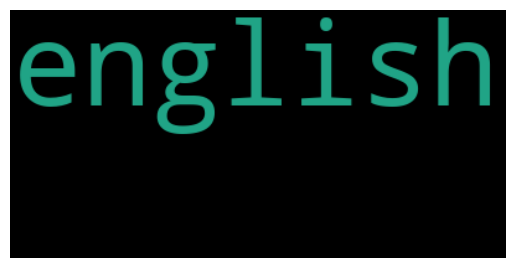

LAW


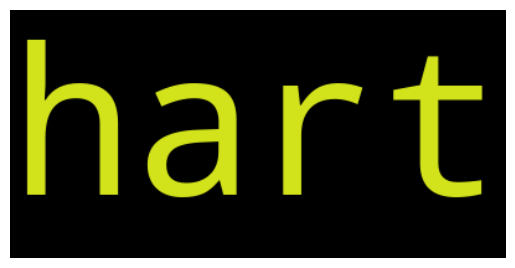

LOC


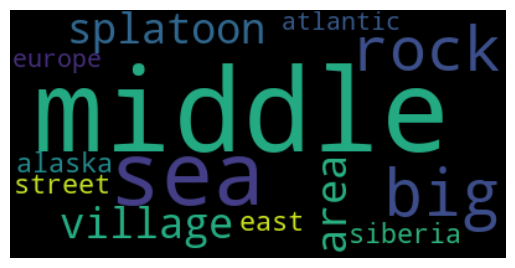

NORP


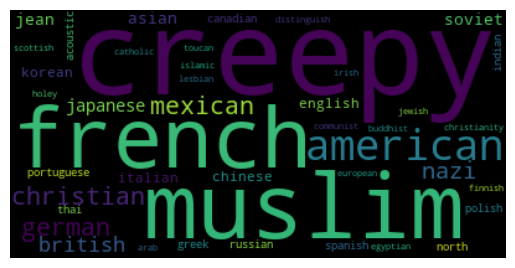

ORDINAL


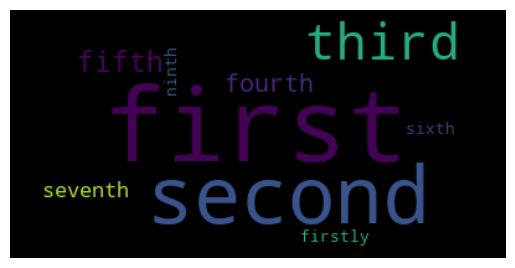

ORG


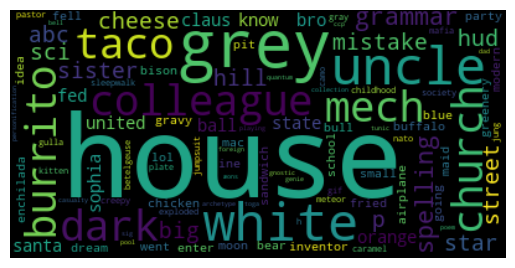

PERSON


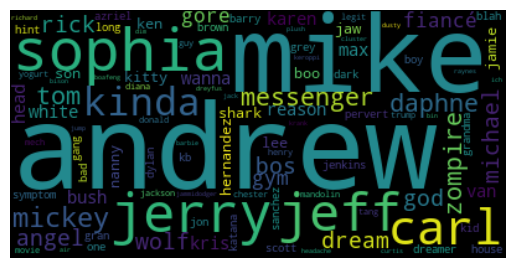

PRODUCT


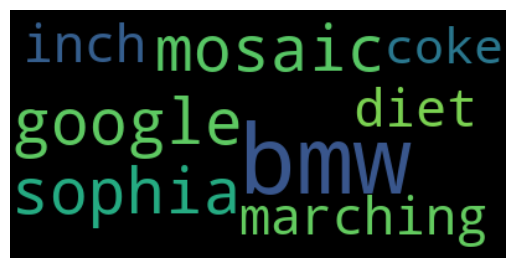

QUANTITY


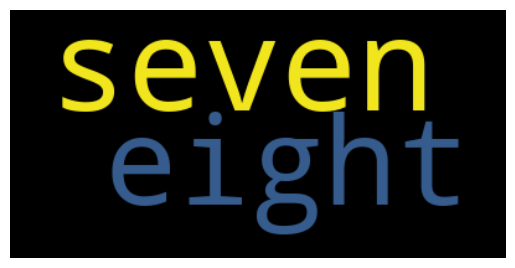

TIME


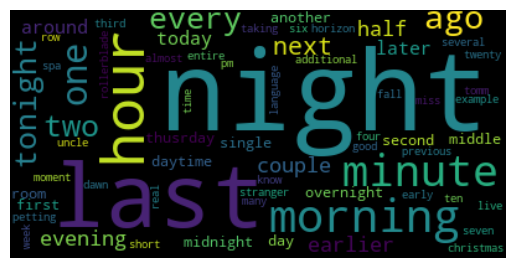

In [19]:
for i in np.unique(tag_df['label']):
    temp = list(tag_df.loc[tag_df['label'] == i , 'word'])
    print(i)
    #print(i, tag_desc[i])
    try:
        wordcloud(temp, lim = 100)
    except ValueError:
        print("Word Cloud ValueError \n")
        pass

1. https://spacy.io/usage/visualizers
2. https://www.analyticsvidhya.com/blog/2021/06/nlp-application-named-entity-recognition-ner-in-python-with-spacy/

In [16]:
j = 0
for i,k in enumerate(df2['text']):
    if len(nlp(k).ents) > j:
        j = i

In [17]:
df2 = pd.read_csv("../raw data/semi_raw.csv")
sentence = list(nlp(df2['text'][j]).sents)
displacy.render(sentence, style = "ent", jupyter=True, options = {'compact': True})

/Users/veochae/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/spacy/displacy/__init__.py:215: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)
